# Calculating Color Variation

## inporting Libraries and Data

In [1]:
import os
from PIL import Image
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

curPlace = os.getcwd()
Place = curPlace + '\data'
placePath = pathlib.Path(Place)
allFiles = list(placePath.iterdir())

## Using the Color Variation Scoring Method

In [2]:
CArr = np.array([1])
for i in allFiles:
    
    Img = cv2.imread(str(i))
    B,G,R = cv2.split(Img.astype("float"))
    
    rg = np.absolute(R-G)
    yb = np.absolute(((R+G)*0.5)-B)

    rgMean = np.mean(rg)
    rgSTD = np.std(rg)
    ybMean = np.mean(yb)
    ybSTD = np.std(yb)

    rgybMean = np.sqrt(rgMean**2 + ybMean**2)
    rgybSTD = np.sqrt(rgSTD**2 + ybSTD**2)

    C = rgybSTD + (0.3*rgybMean)
    CArr = np.vstack((CArr,C))
    
size = CArr.shape
rows = size[0]
CArr = CArr[1:rows]

## Obtaining all of the File Names

In [3]:
nameList = np.array(["Name"])

for i in allFiles:
    pathString = str(i)
    ind = pathString.find('Figure')
    length = len(pathString)
    name = pathString[ind:length]
    
    ind = name.find('.')
    name = np.array(name[0:ind])
    nameList = np.vstack((nameList, name))
    
size = nameList.shape
nameList = nameList[1:size[0]]

## Creating the Spreadsheets and Figure Outputs Directory if it does not already exist

In [4]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\spreadsheets'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

In [5]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\figure outputs'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

## Exporting the Data to a new Excel File

In [6]:
data = pd.DataFrame(CArr, columns = [ "Color Variation Score"])
nameData = pd.DataFrame(nameList, columns = ["Figure Number"])
newData = pd.concat([nameData,data], axis =1, join = "inner")
newData.to_excel(curPlace + '\spreadsheets\Color Score.xlsx')

## Ploting the Results

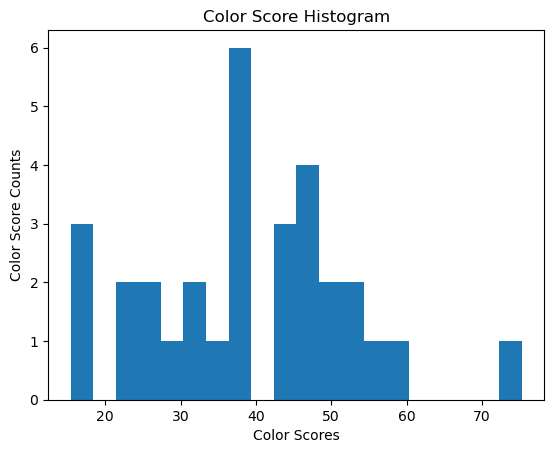

In [7]:
plt.hist(CArr,20)
plt.xlabel('Color Scores')
plt.ylabel('Color Score Counts')
plt.title('Color Score Histogram')
plt.savefig(os.getcwd() + '\\figure outputs\\Color Score Histogram.png')

## Finding the Maximum Color Score

In [8]:

i = 0
init = 0

size = CArr.shape

while i < size[0]:
    curVal = CArr[i]
    
    if curVal >= init:
        init = curVal
        maxidx = i
    i = i + 1

print(maxidx)
print(init)

26
[75.25999603]


## Finding the Minimum Color Score

In [9]:
i = 0
init = 100

size = CArr.shape

while i < size[0]:
    curVal = CArr[i]
    
    if curVal <= init:
        init = curVal
        minidx = i
    i = i + 1

print(minidx)
print(init)

24
[15.42084484]


## Displaying the Minimum and the Maximum Image

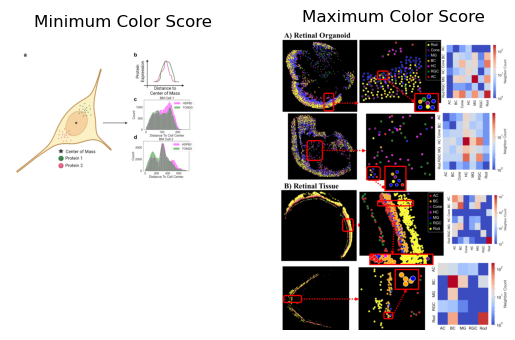

In [10]:
minImgPath = str(allFiles[minidx])
maxImgPath = str(allFiles[maxidx])

minImg = cv2.imread(minImgPath)
minImg = cv2.cvtColor(minImg, cv2.COLOR_BGR2RGB)
maxImg = cv2.imread(maxImgPath)
maxImg = cv2.cvtColor(maxImg, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(minImg)
plt.title('Minimum Color Score')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(maxImg)
plt.title('Maximum Color Score')
plt.axis('off')
plt.savefig(os.getcwd() + '\\figure outputs\\Min and Max Color Score.png')